In [1]:
from classes import PostCode,Transaction,Property
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import logging


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
 # ------------------ CONFIG --------------------------------------------------- #

log = logging.getLogger(__name__)

logging.basicConfig(level=logging.INFO,format='%(name)s - %(levelname)s - %(message)s')

In [4]:
# ------------------ GET INFO ON A PROPERTY / TRANSACTION ------------------------ # 

property_name = input('Enter a property ID:')
if not property_name:
    property_name = 'LANCASHIRE-FYLDE-LYTHAM ST ANNES-nan-SANDGATE-6-nan-D'

try:
    property = Property(property_name)
    log.info("Info on property with ID %s is: %s",property_name,property.__dict__)
except Exception as e:
    log.error(e)

transaction_name = input('Enter a transaction ID:')
if not transaction_name:
    transaction_name = '{23B6165E-6C04-FCF4-E050-A8C0620577FA}'

try:
    transaction = Transaction(transaction_name)
    log.info("Info on transaction with ID %s is: %s",transaction_name,transaction.__dict__)
except Exception as e:
    log.error(e)

Enter a property ID:


__main__ - INFO - Info on property with ID LANCASHIRE-FYLDE-LYTHAM ST ANNES-nan-SANDGATE-6-nan-D is: {'id': 'LANCASHIRE-FYLDE-LYTHAM ST ANNES-nan-SANDGATE-6-nan-D', 'county': 'LANCASHIRE', 'district': 'FYLDE', 'town': 'LYTHAM ST ANNES', 'locality': nan, 'street': 'SANDGATE', 'PAON': '6', 'SAON': nan, 'type': 'D'}


Enter a transaction ID:


__main__ - INFO - Info on transaction with ID {23B6165E-6C04-FCF4-E050-A8C0620577FA} is: {'id': '{23B6165E-6C04-FCF4-E050-A8C0620577FA}', 'price': 500000, 'date': Timestamp('2015-09-21 00:00:00'), 'age': 'N', 'duration': 'F'}


In [5]:
# ------------------ GET ALL TRANSACTIONS in a postcode ---------------- #

postcode_name = input('Enter a postcode:')
if not postcode_name:
    postcode_name = 'ST10 4BS'

try:
    postcode = PostCode(postcode_name)
    res = postcode.get_transactions(initial_date = datetime(2019,1,1), final_date = datetime(2020,1,1))
    log.info("The properties sold in %s are: %s",postcode_name,res)
    log.info("The number of properties sold in %s is: %s",postcode_name,len(res))
except Exception as e:
    log.error(e)

Enter a postcode:


__main__ - INFO - The properties sold in ST10 4BS are: Index(['{9DBAD222-22BC-6EB3-E053-6B04A8C0F257}', '{87E1551E-7F39-6405-E053-6C04A8C0B2EE}'], dtype='object', name='Transaction ID')
__main__ - INFO - The number of properties sold in ST10 4BS is: 2


In [7]:
# ----------------- GET PROPERTY BASED ON TRANSACTION ---------------------------- # 

transaction_name = input('Enter a transaction ID:')
if not transaction_name:
    transaction_name = '{7C2D0701-0253-4963-E053-6B04A8C07B97}'

try:
    transaction = Transaction(transaction_name)
    property_name = transaction.get_properties()
    property = Property(property_name)
    log.info("Info on property with ID %s is: %s",property_name,property.__dict__)
except Exception as e:
    log.error(e)

Enter a transaction ID:


__main__ - INFO - Info on property with ID CORNWALL-CORNWALL-HAYLE-ST ERTH-TREMELLIN LANE-WHEAL SQUIRES, 4-nan-O is: {'id': 'CORNWALL-CORNWALL-HAYLE-ST ERTH-TREMELLIN LANE-WHEAL SQUIRES, 4-nan-O', 'county': 'CORNWALL', 'district': 'CORNWALL', 'town': 'HAYLE', 'locality': 'ST ERTH', 'street': 'TREMELLIN LANE', 'PAON': 'WHEAL SQUIRES, 4', 'SAON': nan, 'type': 'O'}


In [8]:
# ---------------- Which postcodes have seen the highest increase in transactions during the last 5 years? --------- #

by_name = input('Enter value or number:')
if not by_name:
    by_name = "number"
try:
    res = PostCode.find_top_codes(n=10,initial_year=2016,final_year=2020,by=by_name)
    log.info("The codes which have grown the most in terms of %s of transactions are: %s",by_name,res.index)
except Exception as e:
    log.error(e)

Enter value or number:


numexpr.utils - INFO - NumExpr defaulting to 4 threads.
__main__ - INFO - The codes which have grown the most in terms of number of transactions are: Index(['WC2A', 'EC2N', 'LL25', 'NR22', 'EC2M', 'M17', 'SA35', 'TD9', 'WC1E',
       'EC2A'],
      dtype='object', name='Area Code')


In [9]:
# --------------- Can you come up with an indication of a ‘migration’ metric in the UK? ---------------------- #

year_name = input('Enter year:')
if not year_name:
    year_name = 2019
year_name = int(year_name)

try:
    res = PostCode.gravity_centre(year = year_name,by = "number")
    log.info("The gravity centre (trans number) for year %s is: %s",year_name,res)
    res = PostCode.gravity_centre(year = year_name,by = "value")
    log.info("The gravity centre (trans value) for year %s is: %s",year_name,res)
except Exception as e:
    log.error(e)

Enter year:


__main__ - INFO - The gravity centre (trans number) for year 2019 is: [-1.3829099  52.38650796]
__main__ - INFO - The gravity centre (trans value) for year 2019 is: [-1.04012216 52.04215093]


Enter an areacode:


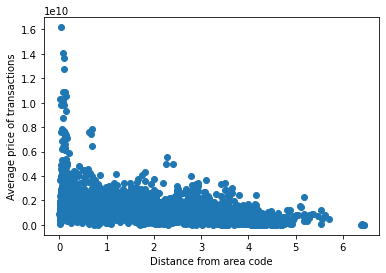

In [10]:
# -------------- Can you plot the average transaction price of a postcode as a function of distance from EC1A? -------------- #

areacode_name = input('Enter an areacode:')
if not areacode_name:
    areacode_name = 'EC1A'

try:
    res = PostCode.distance_predict(area_code=areacode_name,by="value")
    plt.scatter(res["distance"],res["y"])
    plt.xlabel("Distance from area code")
    plt.ylabel("Average price of transactions")
    plt.show()
except Exception as e:
    log.error(e)

In [11]:
# --------------- Can you find any correlation between the average house prices (url #4), and a CPI indicator (url #5)? ----------- #

# import CPI and avg price data
avg_price = pd.read_csv('./data/made/Avg_price_proc.csv',index_col=0)
CPI = pd.read_csv('./data/made/CPI_proc.csv',index_col=0)

try:
    # merge data
    time_series = avg_price.merge(CPI,left_index=True,right_index=True,how="inner")
    coeff, p = pearsonr(time_series["Average_Price"],time_series["Value"])
    log.info("Coefficient and p-value are: %s , %s",coeff,p)
except Exception as e:
    log.error(e)

__main__ - INFO - Coefficient and p-value are: 0.9412434096801069 , 2.5941703199121623e-188
